<i>Written by: Ahsan Khan, On behalf of Alberta Machine Intelligence Institute for the Al Pathways Partnership supported by Prairies Economic Development Canada</i>

# Lab 3: Regression

In this lab we will be working with three regression models. The type you pick depends on the relationship between the features and the target variables.

In [ ]:
#Crucial data processing and analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the modules required to build and evaluate a Regression model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#Loading the boston housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


##### Preparing our Data (Boston housing)

In [ ]:
# The dependent variable. This is the Median value of owner-occupied homes in $1000's
y = target

#Features
X = data

In [ ]:
df = pd.DataFrame(X,columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Lab Activity One: Linear Regression on One Variable

The linear regression model is best used when there is a **linear** relationship between your features (``X``) and the your target (``Y``). The code cell below prepare the data for you for lab activity one.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# We will only apply linear regression on one of the features.
#Here we are selecting the 'RM' column (Average number of rooms) from our dataset
X = X[:,5]

# Reshaping the array to be in the proper format. The X array always has to be 2-dimensional as an input into the model along with a one dimensional target(y) array
X = X.reshape(-1,1)

print(X.shape)
print(y.shape)

(506, 1)
(506,)


> [AX] indicates an activity to be answered.

##### [A1] Plot a scatter plot of the Number of Rooms(X) vs the Price(y).

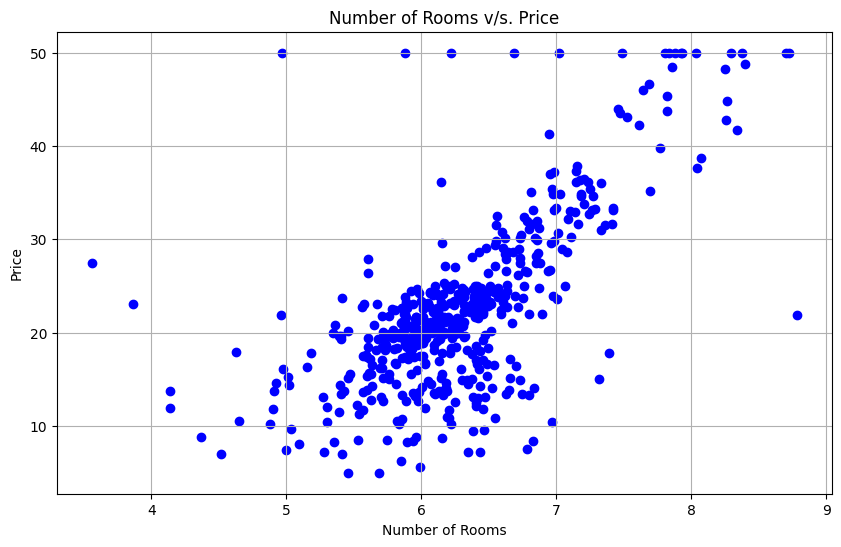

In [ ]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', marker='o', label='Data Points')

# Add labels and title
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Number of Rooms v/s. Price')



# Showing the scatter plot
plt.grid(True)
plt.show()

##### [A2] Describe the relationship



##### [A3] Split your data, Instantiate and Fit a lenear regression model

In [ ]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

##### [A4] Get and print the intercept and the coefficient of our linear function. Recall ``y = mx + c``, where m is the coefficient and ``c`` is the intercept.

In [ ]:
intercept = model.intercept_ # Get the intercept (c) and coefficient (m) from the fitted model
coefficient = model.coef_[0]  # The coefficient is stored in an array, so we access it at index 0

# Print the intercept and coefficient
print(f"Intercept (c): {intercept}")
print(f"Coefficient (m): {coefficient}")

Intercept (c): -36.24631889813795
Coefficient (m): 9.348301406497727


##### [A5] Plot another scatter plot of your ``X`` and ``y`` data again and this time add a line of best fit (``y = mx +c`` function)

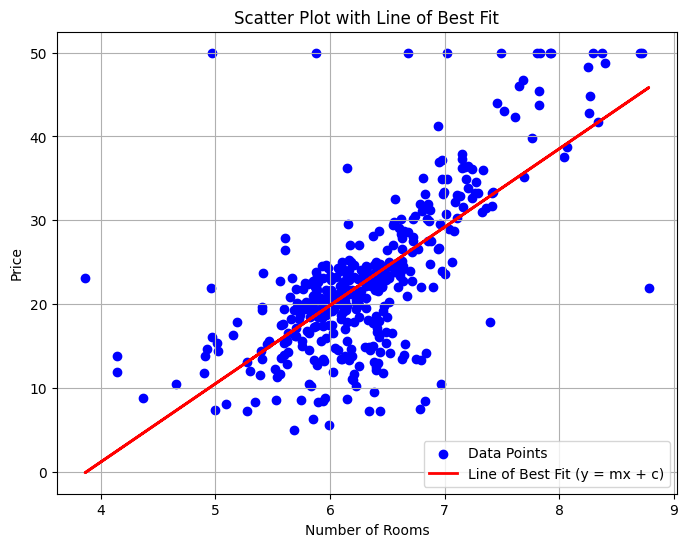

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', marker='o', label='Data Points')
# Add the line of best fit (y = mx + c)
plt.plot(X_train, coefficient*X_train +  intercept, color='red', linestyle='-', linewidth=2, label='Line of Best Fit (y = mx + c)')

# Add labels and title
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Scatter Plot with Line of Best Fit')

# Adding a feature in the scatter plot which represents what.
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

##### [A6] Predict on your ``X_test`` data and evaluate your model using the R2 statistic

In [ ]:
# Predict on the test data using the trained model
y_pred = model.predict(X_test)

In [ ]:
# Calculate the R-squared (R2) statistic
r2 = r2_score(y_test, y_pred)
r2

0.3707569232254778

## Lab Activity Two: Multilinear Regression

Fitting a linear model on data with more than one feature is called multilinear regression. For this activity you will be fitting a multilinear regression on all of the features of the boston dataset.
The code cell below prepares the data for you

In [ ]:
y_2 = target

#Features
X_2 = data

#Creating The full dataframe
df = pd.DataFrame(X_2,columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
df.head()

df['Price'] = y_2

df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


##### [A7] Split, instantiate and fit model using all of the features. Remember to use ``X_2`` and ``y_2`` for the train,test split and use different variable names than the ones used in lab activity one.

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# Instantiate the Linear Regression model
model_2 = LinearRegression()

# Fit the model to the training data
model_2.fit(X_train_2, y_train_2)

LinearRegression()

##### [A8] Predict on your test set you split in this activity and evaluate the model.

In [ ]:
# Predict on the test data using the trained model
y_pred_2 = model_2.predict(X_test_2)

# Calculate the R-squared (R2) statistic
r2_2 = r2_score(y_test_2, y_pred_2)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test_2, y_pred_2)

# Print the evaluation metrics
print(f'R-squared (R2) Score: {r2_2}')
print(f'Mean Squared Error (MSE): {mse}')

R-squared (R2) Score: 0.6687594935356325
Mean Squared Error (MSE): 24.291119474973485


## Lab Activity Three: Regression on Non-Linear Data

When performing a regression analysis, you will find the linear regression algorithm is the simplest approach. However, if the data is non-linear it  may call for using a different algorithm. A decision tree regressor does a good for regression problems that contain non-linear data.
- Non-linear Data: there is no linear relationship between the features and the dataset, thus, less likely to fit a 'line-of-best-fit'

##### [A9] Plot a scatter plot of the flowing features listed below vs the target ``y`` (recall y is the price). You can use 3 different cells for each graph.

- **ZN** : proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** : proportion of non-retail business acres per town
- **RAD** : index of accessibility to radial highways

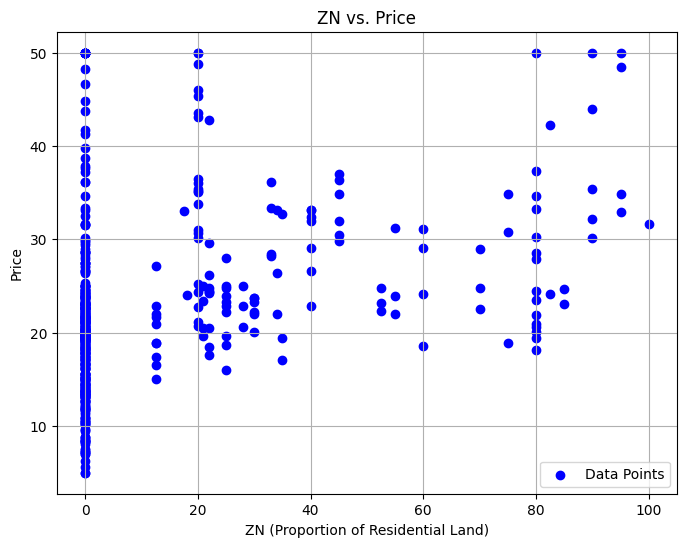

In [ ]:
# Scatter plot for ZN vs. price (y)
plt.figure(figsize=(8, 6))
plt.scatter(df['ZN'], y_2, color='blue', marker='o', label='Data Points')
plt.xlabel('ZN (Proportion of Residential Land)')
plt.ylabel('Price')
plt.title('ZN vs. Price')
plt.grid(True)
plt.legend()
plt.show()

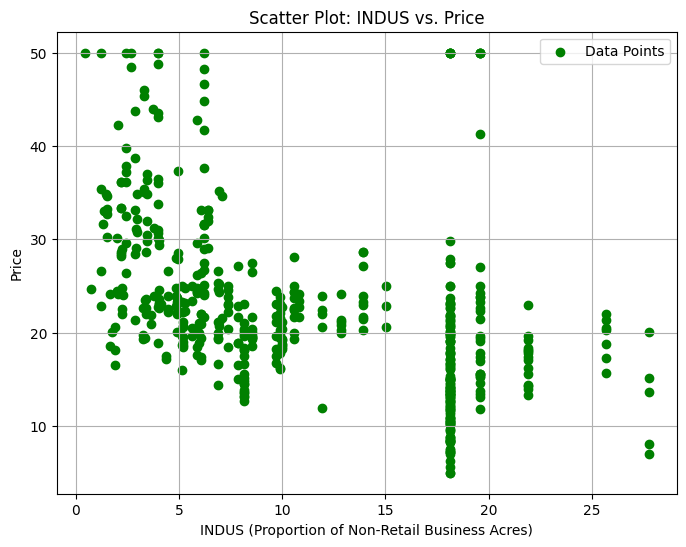

In [ ]:
# Scatter plot for INDUS vs. price (y)
plt.figure(figsize=(8, 6))
plt.scatter(df['INDUS'], y_2, color='green', marker='o', label='Data Points')
plt.xlabel('INDUS (Proportion of Non-Retail Business Acres)')
plt.ylabel('Price')
plt.title('Scatter Plot: INDUS vs. Price')
plt.grid(True)
plt.legend()
plt.show()

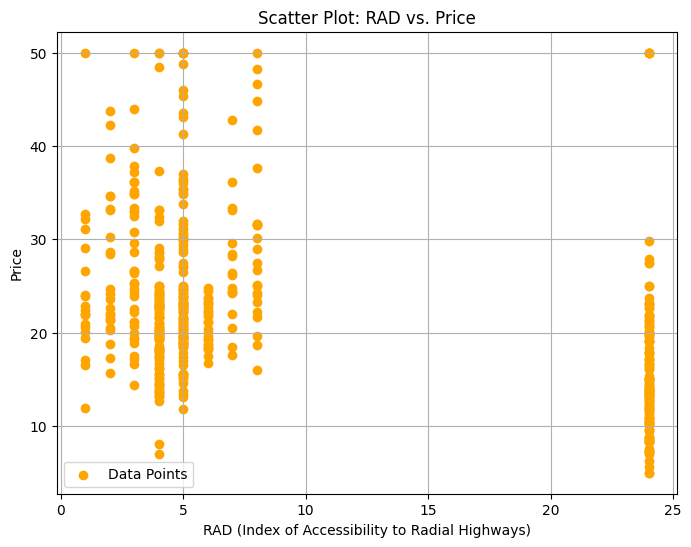

In [ ]:
# Scatter plot for RAD vs. price (y)
plt.figure(figsize=(8, 6))
plt.scatter(df['RAD'], y_2, color='orange', marker='o', label='Data Points')
plt.xlabel('RAD (Index of Accessibility to Radial Highways)')
plt.ylabel('Price')
plt.title('Scatter Plot: RAD vs. Price')
plt.grid(True)
plt.legend()
plt.show()

You will notice that these features don't have a linear relationship with the price (target). There is non-linearity in the data. This is where a different reggression model will give us better results.

##### [A10] You will now be building a Decision Tree Regressor model. Instantiate and fit the DT regressor using the same training data from lab activity two.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(random_state=42)  # You can set the random state for reproducibility

# Fit the model to the training data
dt_regressor.fit(X_train_2, y_train_2)

##### [A11] Predict on your test data (same test data from activity two) and evaluate your model. Remember to use different variable names where appropriate.

In [ ]:
# Predict on the test data using the Decision Tree Regressor model
y_pred_dt = dt_regressor.predict(X_test_2)

# Calculate the R-squared (R2) statistic for Decision Tree Regressor
r2_dt = r2_score(y_test_2, y_pred_dt)

# Calculate the mean squared error (MSE) for Decision Tree Regressor
mse_dt = mean_squared_error(y_test_2, y_pred_dt)

# Print the evaluation metrics for Decision Tree Regressor
print(f'Decision Tree Regressor - R-squared (R2) Score: {r2_dt}')
print(f'Decision Tree Regressor - Mean Squared Error (MSE): {mse_dt}')